In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Discrete Distribution

## Bernoulli distribution
Given a certain probability $p$, the Bernoulli distribution takes value $k=1$, meanwhile it takes $k=0$ in all the other cases $1-p$. The outcome of one experiment(single coin toss) can be described by a Bernoulli distribution. What is the probability of head?

$f(k;p) = \left\{
       \begin{array}{lll}
         1 - p & \qquad if \quad k = 0 \\
         p & \qquad if \quad k = 1.
       \end{array}
       \right.$

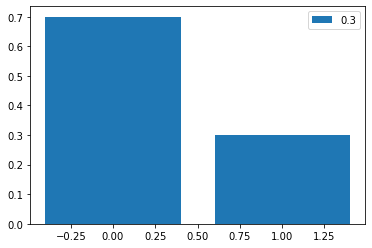

In [2]:
p = 0.3
a = np.arange(2)
x = stats.bernoulli.rvs(p, size=10)
plt.bar(a, stats.bernoulli.pmf(a, p), label=p)
plt.legend()


## Binomial
If one experiment (e.g. coin toss) consists of several trials then the outcome can be described with a binomial distribution. What is the probability to observe k heads in n trails?

$f(k;n,p) = \binom{n}{k}p^k(1 - p)^{n - k}$

where: $\binom{n}{k} = \frac{n!}{k!(n - k)!}$

mean= 10.0, var= 5.0, skewness= 0.0, kurtosis= -0.1


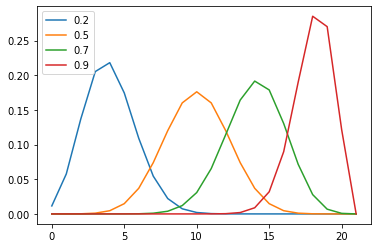

In [6]:
k = np.arange(0, 22)
p = [0.2, 0.5, 0.7, 0.9]
for i in p:
    plt.plot(k, stats.binom.pmf(k, 20, i), label=i)
    plt.legend()
mean, var, skew, kurt = stats.binom.stats(20, 0.5, moments='mvsk')
print(f'mean= {mean}, var= {var}, skewness= {skew}, kurtosis= {kurt}')

## Poisson 
where $\lambda > 0$. The Poisson Distribution can be used to model count data (i.e., how often does an event occur in an interval). For example: How many goals are scored during a match? How many accidence happen per day? How many visitors does a website atrract per day?

Events must occur independently.
<br>Probability of an event in an interval is proportional to the length of the interval.
<br>The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.

$f(\lambda;k) = e^{-\lambda}\frac{\lambda^k}{k!}$

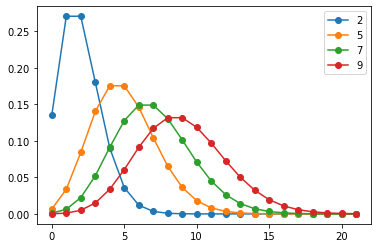

In [9]:
lamb = [2, 5, 7, 9]
k = np.arange(0, 22)
for i in lamb:
    plt.plot(k, stats.poisson.pmf(k, i), '-o', label=i)
    plt.legend()

## Geometric distribution
Where $p > 0$. The number of flips a coin with heads probability p until the first heads

$f(p;x) = p.(1 - p)^{x - 1}$

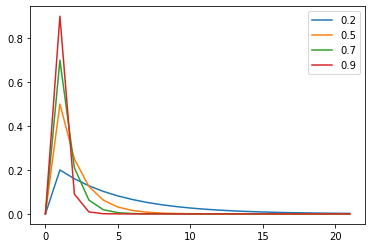

In [10]:
p = [0.2, 0.5, 0.7, 0.9]
x = np.arange(0,22)
for i in p:
    plt.plot(x, stats.geom.pmf(k, i), label=i)
    plt.legend()

# Continuous Random variable

## Normal distribution
Normal($\mu, \sigma^2$) is also known as the Gaussian distribution, which mean $\mu$ and variance $\sigma^2$.
Represent real-valued random variables whose distributions are not known. The normal distribution is useful because of the central limit theorem. In its most general form, under some conditions (which include finite variance), it states that averages of random variables independently drawn from independent distributions converge in distribution to the normal distribution.

The probability density function (PDF):

$f(\mu,\sigma^2;x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $

mean:0.0, var:1.0, skew:0.0, kurtusis:0.0
*) Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.
*) Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. 
*) Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
*) Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.


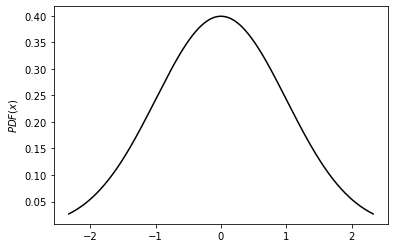

In [15]:
x = np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 1000)
norm = stats.norm()
plt.plot(x, norm.pdf(x), 'k-')
plt.ylabel('$PDF(x)$')
mean, var, skew, kurt = norm.stats(moments='mvsk')
print("mean:%s, var:%s, skew:%s, kurtusis:%s" %(mean, var, skew, kurt))
print("*) Skewness is a measure of the lack of symmetry. A normal distribution which is symmetric has a skewness=0.")
print("*) Negative values for the skewness indicate data that are skewed left. Positive values indicate right skew. ")
print("*) Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.")
print("*) Normal distribution has a kurtosis=0. A flatter distribution has a negative kurtosis. A more peaked distribution has a positive kurtosis.")

## Cumulative distribution
Cumulative distribution function (CDF) of a discrete random variable X is the probability that X will take a value less than or equal to x. In the case of a continuous distribution, it gives the area under the probability density function from minus infinity to x.

Percent point function (PPF) or inverse cumulative function: just switch x and y axis in CDF plot. Gives the value of the x for which the cumulative probability has a certain value.

Text(0.5, 0, 'x value')

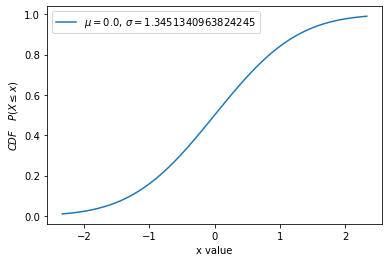

In [21]:
# cumulative distribution
mu = np.mean(x)
sigma = np.std(x, ddof=1)
plt.plot(x, norm.cdf(x), label='$\mu= $'+str(mu)+', $\sigma= $'+str(sigma))
plt.legend()
plt.ylabel('$CDF \quad P(X \leq x)$')
plt.xlabel('x value')

## Chi-square distribution
f(k;x) Where x > 0, k > 0, k is the degree of freedom. Distribution of a sum of the squares of k independent standard normal random variables.

Chi-square distribution is the special case of gamma distribution with gamma parameter a = k/2

$f(k;x) = \frac{x^{k/2 - 1}}{2^{k/2}\Gamma(\frac{k}{2})}e^{-k/2}$

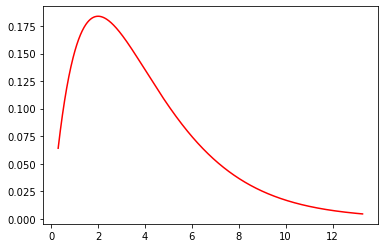

In [22]:
df = 4
x = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 1000)
plt.plot(x, stats.chi2.pdf(x, df), 'r-')

## Beta distribution
$f(x;\alpha,\beta)$ where 1 > x > 0, $\alpha, \beta > 0$. The PDF of the Beta distribution is a power function of the variable x and its reflection 1 - x

The beta distribution can be understood as representing a distribution of probabilities- that is, it represents all the possible values of a probability when we don't know what that probability is. The Beta distribution is defined for a variable ranging between 0 and 1.

Example: penalty shootout success of a single football player in a certain season = number of goals during penalty shootout / total number of penalty shootouts. The distribution of success probabilities of several seasons follows a beta distribution. Alpha and beta are pseudo counts (i.e. how often have we observed success and how often failure).

The PDF:

$f(x; \alpha,\beta) = constant. x^{\alpha - 1}(1 - x)^{\beta - 1} = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1} = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}$

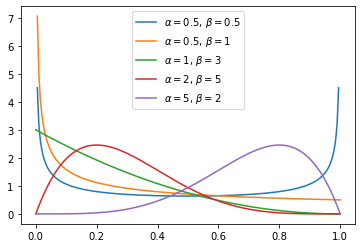

In [23]:
x = np.linspace(0, 1, 200)
alpha = [0.5, 0.5, 1, 2, 5]
beta = [0.5, 1, 3, 5, 2]
for a, b in zip(alpha, beta):
    plt.plot(x, stats.beta.pdf(x, a, b), label=r'$\alpha= ${0}, $\beta= ${1}'.format(a, b))
    plt.legend()

## Gamma distribution
$f(x;\alpha,\beta) \quad \text{where}\quad x \geq 0; \alpha, \beta \geq 0$. The gamma distribution is used as the conjugate prior (Bayesian distribution) for various types of inverse scale (rate) parameters, such as $\lambda$ in exponential distribution or Poisson distribution

Gamma PDF with parameterized two variable $\alpha, \beta$

$f(x;\alpha,\beta) = \frac{\beta^{\alpha}x^{\alpha - 1}e^{-x}}{\Gamma(\alpha)}$

For all positive integers: $\Gamma(\alpha) = (\alpha - 1)!$

mean: 2.0, variance: 2.0, skewness: 1.414213562373095, kurtosis: 3.0 when a= 2
mean: 3.0, variance: 3.0, skewness: 1.1547005383792517, kurtosis: 2.0 when a= 3
mean: 5.0, variance: 5.0, skewness: 0.8944271909999159, kurtosis: 1.2 when a= 5
mean: 7.0, variance: 7.0, skewness: 0.7559289460184544, kurtosis: 0.8571428571428571 when a= 7


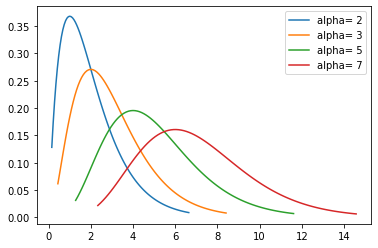

In [32]:
alpha_ = [2, 3, 5, 7]    # alpha value
for a in alpha_:
    mean, var, skew, kurt = stats.gamma.stats(a, moments='mvsk')
    print(f'mean: {mean}, variance: {var}, skewness: {skew}, kurtosis: {kurt} when a= {a}')
    x = np.linspace(stats.gamma.ppf(0.01, a), stats.gamma.ppf(0.99, a), 100)
    plt.plot(x, stats.gamma.pdf(x, a), label=f'alpha= {a}')
    plt.legend()

## Exponential distribution
$f(\lambda;x)$ where $\lambda > 0$. Decaying probabilities density over the non-negative real variable.

$f(\lambda;x) = \left\{  
\begin{array}{c}
    \lambda e^{-\lambda x} & \quad if \quad x \geq 0 \\
    0 & \quad otherwise
\end{array}
\right.$

mean: 1.0, variance: 1.0, skewness: 2.0, kurtosis: 6.0 when a= 6


Text(0, 0.5, 'PDF of x')

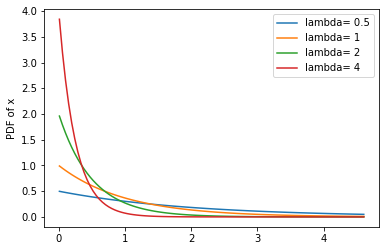

In [30]:
lambdas = [0.5, 1, 2, 4]
mean, var, skew, kurt = stats.expon.stats(moments='mvsk')
print(f'mean: {mean}, variance: {var}, skewness: {skew}, kurtosis: {kurt} when a= {a}')
x = np.linspace(stats.expon.ppf(0.01), stats.expon.ppf(0.99), 100)
for l in lambdas:
    plt.plot(x, stats.expon.pdf(x, scale=1./l), label=f'lambda= {l}')
    plt.legend()
plt.ylabel('PDF of x')

## Uniform distribution
$f(x;a,b)$ where a < b. The equal probability density to every value between a and b on the real line.
$$
f(x;a,b) = \left\{
\begin{array}{}
    \frac{1}{b - a} \quad if \quad a \leq x \leq b \\
    0 \quad otherwise
\end{array}
\right.
$$

(array([0.93102902, 0.91100689, 0.9910954 , 1.0211286 , 1.24137202,
        1.06117286, 0.87096263, 0.94104008, 0.89098476, 1.15127244]),
 array([9.08205820e-04, 1.00797681e-01, 2.00687157e-01, 3.00576632e-01,
        4.00466108e-01, 5.00355583e-01, 6.00245059e-01, 7.00134534e-01,
        8.00024010e-01, 8.99913485e-01, 9.99802961e-01]),
 [<matplotlib.patches.Polygon at 0x7fae1063f210>])

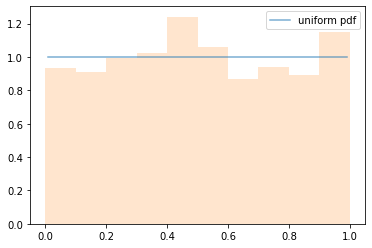

In [34]:
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
plt.plot(x, stats.uniform.pdf(x), alpha=0.6, label='uniform pdf')
plt.legend()
r = stats.uniform.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)

mean: 5.0, variance: 2.5, skewness: 0.0, kurtosis: -0.2 when p= 0.5


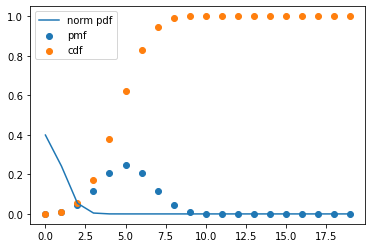

In [36]:
x = np.arange(0, 20)    # range of observations trials
k = 10   # number of gotten observed values 10 heads
p = 0.5 # fair coin
mean, var, skew, kurt = stats.binom.stats(k, p, moments='mvsk')
print(f'mean: {mean}, variance: {var}, skewness: {skew}, kurtosis: {kurt} when p= {p}')
plt.scatter(x, stats.binom.pmf(x, k, p), label='pmf')
plt.scatter(x, stats.binom.cdf(x, k, p), label='cdf')
plt.plot(x, stats.norm.pdf(x), label='norm pdf')
plt.legend()

## Multinomial distribution
The multinomial distribution is a generalization of the binomial distribution. For example, it models the probability of counts for each side of a k-sided die rolled n times. For n independent trials each of which leads to a success for exactly one of k categories, with each category having a given fixed success probability, the multinomial distribution gives the probability of any particular combination of numbers of successes for the various categories.

When k = 2 and n = 1 the Multinomial is the Bernoulli distribution.

When k = 2 and n > 1, it is the Binomial distribution.

When k > 2 and n = 1, it is the Categorical distribution.

The PMF 

$f(x_1,\dots,x_k;n,p_1,\dots,p_k) = \left\{
\begin{array}{l}
    \frac{n!}{x_1!x_2!\dots x_k!}p_1^{x_1}p_2^{x_2}\dots p_k^{x_k} \quad when \quad \displaystyle\sum_{i=1}^k x_i = n \\
    0 \quad otherwise
\end{array}
\right.
$

The PMF can be expressed with gamma function:

$f(x_1,\dots,x_k;n,p_1,\dots,p_k) = \frac{\Gamma(\sum_{i} x_i + 1)}{\prod_i\Gamma(x_i + 1)}\displaystyle\prod_{i=1}^kp_i^{x_i}$

Text(0.5, 1.0, 'Theoretical p(X=K) = 0.0248')

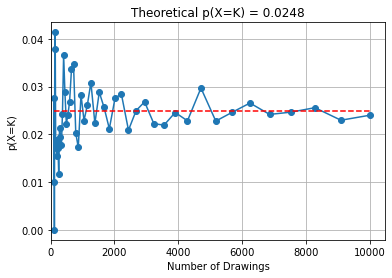

In [49]:
%matplotlib inline
# set seed for reproductibility
np.random.seed(999) 

#%% Multinoulli example

n = 12                      # number of trials (games in one tourment)
pvals = [0.4, 0.35, 0.25]   # probabilities on a single trial
 

sizes =[] # number of tournments played
# a list to hold ratios (converge to prob) that player 1 wins 7 times, player 2 wins 2 times and 3 ties
p = []    

for size in np.logspace(2,4):
    # the line below is where we actually generate discrete random variables according the 
    # multinomial distribution
    outcomes = np.random.multinomial(n, pvals, size=int(size))
    
    # let's count the ratio of the expected outcome over all the outcomes - 
    # this will lastly converge to the probability
    prob = sum((outcomes[:,0]==7)&(outcomes[:,1]==2)&(outcomes[:,2]==3))/len(outcomes)
    
    p.append(prob)
    sizes.append(int(size))

# Plotting
# fig1 = plt.figure()
plt.plot(sizes,p,'o-')
plt.plot(sizes,[0.0248]*len(sizes),'--r')
plt.grid()
plt.xlim(xmin=0)
plt.xlabel('Number of Drawings')
plt.ylabel('p(X=K)')
plt.title('Theoretical p(X=K) = 0.0248')
# save figure
# fig1.savefig('multinomial.png'